## Descision Tree Classifier With Semi Supervised Learning

### What is Semi-Supervised Learning:
Semi-supervised learning combines a small amount of labeled data with a larger amount of unlabeled data to train a machine learning model.

### What is Decision Tree Classifier:
A decision tree is a supervised machine learning algorithm that is a flowchart-like tree structure where it predicts the value of a target variable by learning simple decision rules inferred from the data features(or attributes). The internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.
Read more:

1.https://scikit-learn.org/stable/modules/tree.html

2.https://www.datacamp.com/tutorial/decision-tree-classification-python

### Importing Needed Libraries



In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import pathlib
import shutil
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
import random

# Remove folders if needed

In [ ]:
def delete_folder(folder_name):
  directory_to_delete="/content/data_256_" + folder_name
  try:
    shutil.rmtree(directory_to_delete)

  except Exception as e:
    print(e)

### Upload the dataset into the notebook
The following steps will be to upload the data here and then unzip the file that contains them.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_256.zip to data_256 (1).zip


In [ ]:
!unzip drive/MyDrive/CEREBRO/data_256.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data_256/library indoor/00000428.jpg  
  inflating: data_256/library indoor/00000400.jpg  
  inflating: data_256/library indoor/00000366.jpg  
  inflating: data_256/library indoor/00000372.jpg  
  inflating: data_256/library indoor/00000414.jpg  
  inflating: data_256/library indoor/00000399.jpg  
  inflating: data_256/library indoor/00000158.jpg  
  inflating: data_256/library indoor/00000164.jpg  
  inflating: data_256/library indoor/00000602.jpg  
  inflating: data_256/library indoor/00000616.jpg  
  inflating: data_256/library indoor/00000170.jpg  
  inflating: data_256/library indoor/00000825.jpg  
  inflating: data_256/library indoor/00000831.jpg  
  inflating: data_256/library indoor/00000819.jpg  
  inflating: data_256/library indoor/00000992.jpg  
  inflating: data_256/library indoor/00000986.jpg  
  inflating: data_256/library indoor/00000038.jpg  
  inflating: data_256/library indoor/0

### Check the count for the uploaded data

In [5]:
data_dir = pathlib.Path('/mnt/sdb1/vincent/ST25/script/side_project/data_256')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5000


In [2]:
pwd

'/mnt/sdb1/vincent/ST25/script/side_project'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Display an image from the data

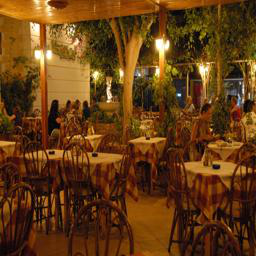

In [5]:
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

## Preproccessing
Our first step is to reduce the dimensionality of our dataset images because of the limited resources we have.

### Resize

In [9]:
# Base directory containing the folders of images
base_input_directory = '/mnt/sdb1/vincent/ST25/script/side_project/data_256'
base_output_directory = '/mnt/sdb1/vincent/ST25/script/side_project/data_256_resize'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
  os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
  input_folder = os.path.join(base_input_directory, folder)
  output_folder = os.path.join(base_output_directory, folder)

  # Create an output subfolder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  # Process each image in the folder
  for filename in os.listdir(input_folder):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
          # Read the image
          img = cv2.imread(os.path.join(input_folder, filename))

          # Resize the image
          resized = cv2.resize(img, (128, 128))

          # Save the resized image to the corresponding output subfolder
          cv2.imwrite(os.path.join(output_folder, filename), resized)

print('All image processing complete.')


All image processing complete.


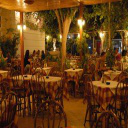

In [10]:
data_dir = pathlib.Path('/mnt/sdb1/vincent/ST25/script/side_project/data_256_resize')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Grayscale

In [4]:
# Base directory containing the folders of images
base_input_directory = '/mnt/sdb1/vincent/ST25/script/side_project/data_256' # if you want to first resize the images, imput '/content/data_256_resize'
base_output_directory = '/mnt/sdb1/vincent/ST25/script/side_project/data_256_grayscale'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
  os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
  input_folder = os.path.join(base_input_directory, folder)
  output_folder = os.path.join(base_output_directory, folder)

  # Create an output subfolder if it doesn't exist
  if not os.path.exists(output_folder):
      os.makedirs(output_folder)

  # Process each image in the folder
  for filename in os.listdir(input_folder):
      if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
          # Read the image
          img = cv2.imread(os.path.join(input_folder, filename))


          # Grayscale the image
          grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          # Save the resized image to the corresponding output subfolder
          cv2.imwrite(os.path.join(output_folder, filename), grayscaled)

print('All image processing complete.')




All image processing complete.


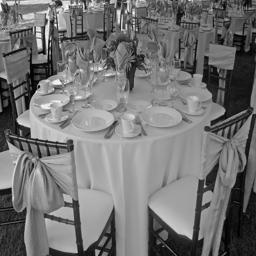

In [ ]:
data_dir = pathlib.Path('http://localhost:8889/lab/tree/side_project/')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Flatten

In [15]:
def load_images_and_labels(base_directory):
    images = []
    labels = []
    label_names = os.listdir(base_directory)

    # Loop over each label
    for label in label_names:
        folder_path = os.path.join(base_directory, label)
        if os.path.isdir(folder_path):
            # Loop over each image file
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if filename.lower().endswith('.jpg'):
                    # Read the image
                    img = cv2.imread(file_path)

                    # Flatten the image and append to the list
                    images.append(img.flatten())
                    labels.append(label)

    return np.array(images), np.array(labels), label_names

# Path to the dataset
dataset_path = '//mnt/sdb1/vincent/ST25/script/side_project/data_256_grayscale'
# images, labels, label_names = load_images_and_labels(dataset_path)
X_l, y_labeled, label_names = load_images_and_labels(dataset_path)


Normalisation

In [16]:
X_labeled=preprocessing.normalize(X_l, axis=1)

### Split dataset

In [17]:
X_labeled_old = X_labeled
y_labeled_old = y_labeled

In [ ]:
X_labeled = X_labeled_old
y_labeled = y_labeled_old

In [ ]:
from sklearn.model_selection import train_test_split

X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=0)


labeled_percentage = 0.2  # You can adjust this as needed

# Split the labeled data into labeled and unlabeled subsets
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X_train_labeled, y_train_labeled, test_size=1 - labeled_percentage, random_state=0)

In [ ]:
print(len(X_test))
print(len(X_unlabeled))
print(len(X_labeled))
print(len(y_labeled))

##Training

In [ ]:
# Train initial decision tree on labeled data

clf=DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=50) #we use the same hyperparameters as for the supervised model
clf = clf.fit(X_labeled, y_labeled)

y_pred_unlabeled = clf.predict(X_unlabeled)
Proba_unlabeled=clf.predict_proba(X_unlabeled)
Proba_labeled=clf.predict_proba(X_labeled)

y_pred_labeled=clf.predict(X_labeled)
print("Accuracy labeled:", accuracy_score(y_labeled, y_pred_labeled))
print("Classification labeled:\n", classification_report(y_labeled, y_pred_labeled))

y_pred_test=clf.predict(X_test)
print("Accuracy test:", accuracy_score(y_test, y_pred_test))
print("Classification test:\n", classification_report(y_test, y_pred_test))

In [ ]:
threshold=0.95
len_labeled=len(X_labeled)

for i in range (0,7):
  delet=[]
  for j in range (0,len(X_unlabeled)):
    if max(Proba_unlabeled[j]) > threshold: #or Proba_unlabeled[j][label_names.index(y_pred_unlabeled[j])] > threshold
      X_labeled=np.append(X_labeled,[X_unlabeled[j]], axis=0)
      y_labeled=np.append(y_labeled,[y_pred_unlabeled[j]], axis=0)
      delet.append(j)
  delet.reverse()
  for k in delet:
    X_unlabeled=np.delete(X_unlabeled,k, axis=0)
  Proba_labeled=clf.predict_proba(X_labeled)
  delet2=[]
  for l in range (0,len(X_labeled)):
    if max(Proba_labeled[l]) < .4:
      X_unlabeled=np.append(X_unlabeled,[X_labeled[l]], axis=0)
      delet2.append(l)
  delet2.reverse()
  for m in delet2:
    X_labeled=np.delete(X_labeled,m, axis=0)
    y_labeled=np.delete(y_labeled,m, axis=0)
  len_labeled_2=len(X_labeled)
  print(len_labeled_2-len_labeled)
  len_labeled=len_labeled_2
  clf = clf.fit(X_labeled, y_labeled)
  y_pred_unlabeled = clf.predict(X_unlabeled)
  Proba_unlabeled=clf.predict_proba(X_unlabeled)
  Proba_labeled=clf.predict_proba(X_labeled)
  threshold-=0.05
  y_pred_labeled=clf.predict(X_labeled)
  print("Accuracy labeled:", accuracy_score(y_labeled, y_pred_labeled))
  print("Classification labeled:\n", classification_report(y_labeled, y_pred_labeled))
  y_pred_test=clf.predict(X_test)
  print("Accuracy test:", accuracy_score(y_test, y_pred_test))
  print("Classification test:\n", classification_report(y_test, y_pred_test))

In [ ]:
threshold=0.95
len_labeled=len(X_labeled)

for i in range (0,7):
  delet=[]
  for j in range (0,len(X_unlabeled)):
    if max(Proba_unlabeled[j]) > threshold: #or Proba_unlabeled[j][label_names.index(y_pred_unlabeled[j])] > threshold
      X_labeled=np.append(X_labeled,[X_unlabeled[j]], axis=0)
      y_labeled=np.append(y_labeled,[y_pred_unlabeled[j]], axis=0)
      delet.append(j)
      # X_unlabeled=np.delete(X_unlabeled,j, axis=0)
  delet.reverse()
  for k in delet:
    X_unlabeled=np.delete(X_unlabeled,k, axis=0)
  # Proba_labeled=clf.predict_proba(X_labeled)
  # delet2=[]
  # for l in range (0,len(X_labeled)):
  #   if max(Proba_labeled[l]) < min(threshold,0.7):
  #     X_unlabeled=np.append(X_unlabeled,[X_labeled[l]], axis=0)
  #     delet2.append(l)
  # delet2.reverse()
  # for m in delet2:
  #   X_labeled=np.delete(X_labeled,m, axis=0)
  #   y_labeled=np.delete(y_labeled,m, axis=0)
  len_labeled_2=len(X_labeled)
  print(len_labeled_2-len_labeled)
  len_labeled=len_labeled_2
  clf = clf.fit(X_labeled, y_labeled)
  y_pred_unlabled = clf.predict(X_unlabeled)
  Proba_unlabeled=clf.predict_proba(X_unlabeled)
  Proba_labeled=clf.predict_proba(X_labeled)
  threshold-=0.05
  y_pred_labeled=clf.predict(X_labeled)
  print("Accuracy:", accuracy_score(y_labeled, y_pred_labeled))
  print("Classification:\n", classification_report(y_labeled, y_pred_labeled))
  y_pred_test=clf.predict(X_test)
  print("Accuracy:", accuracy_score(y_test, y_pred_test))
  print("Classification:\n", classification_report(y_test, y_pred_test))



0
Accuracy: 0.59125
Classification:
                 precision    recall  f1-score   support

   art_gallery       0.61      0.64      0.63       169
  banquet_hall       0.51      0.66      0.58       145
    hotel_room       0.60      0.46      0.52       160
library indoor       0.62      0.52      0.57       158
   supermarket       0.62      0.67      0.65       168

      accuracy                           0.59       800
     macro avg       0.59      0.59      0.59       800
  weighted avg       0.60      0.59      0.59       800

233
Accuracy: 0.6515004840271055
Classification:
                 precision    recall  f1-score   support

   art_gallery       0.75      0.53      0.62       169
  banquet_hall       0.54      0.39      0.45       145
    hotel_room       0.67      0.71      0.69       222
library indoor       0.71      0.81      0.75       329
   supermarket       0.52      0.63      0.57       168

      accuracy                           0.65      1033
     macro a

Another method

Use VGG16 Model
VGG16 is a convolutional neural network (CNN) architecture designed for image recognition and classification tasks. One of its usage is Feature Extraction as VGG16 can be a valuable tool for extracting features from images. These features capture essential characteristics like shapes, textures, and edges, which can be beneficial for various computer vision tasks.

In [4]:
# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [5]:
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()

# Apply feature extraction to the dataset
def load_and_extract_features(base_directory):
    features = []
    labels = []
    label_names = os.listdir(base_directory)

    for label in label_names:
        folder_path = os.path.join(base_directory, label)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, filename)
                    features.append(extract_features(file_path))
                    labels.append(label)
    return np.array(features), np.array(labels), label_names

dataset_path = '//mnt/sdb1/vincent/ST25/script/side_project/data_256'
X, y, label_names = load_and_extract_features(dataset_path)

1/1 [==============================] - 0s 93ms/step


In [6]:
n_components = 100
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(len(X_train))

4000


In [8]:


def augment_labeled_set(X_labeled, y_labeled, X_unlabeled, clf, threshold):
    probs = clf.predict_proba(X_unlabeled)
    max_probs = np.max(probs, axis=1)
    confident_indices = np.where(max_probs >= threshold)[0]
    if len(confident_indices) == 0:
        return X_labeled, y_labeled, X_unlabeled, False

    confident_samples = X_unlabeled[confident_indices]
    confident_labels = np.argmax(probs, axis=1)[confident_indices]
    X_labeled = np.vstack((X_labeled, confident_samples))
    y_labeled = np.concatenate((y_labeled, confident_labels))
    X_unlabeled = np.delete(X_unlabeled, confident_indices, axis=0)
    return X_labeled, y_labeled, X_unlabeled, True


# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
threshold_scores = {}  # Dictionary to store scores for each threshold

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    X_train_labeled, X_unlabeled, y_train_labeled, _ = train_test_split(
        X_train, y_train, test_size=0.8, random_state=42)
    clf = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=50)
    clf.fit(X_train_labeled, y_train_labeled)

    threshold = 0.95
    for i in range(5):  # Five iterations of threshold adjustment
        X_train_labeled, y_train_labeled, X_unlabeled, augmentation_occurred = augment_labeled_set(
            X_train_labeled, y_train_labeled, X_unlabeled, clf, threshold)
        
        # Fit model if augmentation occurred
        if augmentation_occurred:
            clf.fit(X_train_labeled, y_train_labeled)
        
        # Record the accuracy for this threshold
        accuracy = accuracy_score(y_test, clf.predict(X_test))
        if threshold not in threshold_scores:
            threshold_scores[threshold] = []
        threshold_scores[threshold].append(accuracy)
        
        # Dynamic threshold decrement
        threshold -= 0.05 if augmentation_occurred else 0.1
        threshold = max(threshold, 0.1)  # Prevent it from going too low

# Compute mean scores for each threshold
mean_scores = {t: np.mean(scores) for t, scores in threshold_scores.items()}
for threshold, mean_score in mean_scores.items():
    print(f"Mean accuracy for threshold {threshold:.2f}: {mean_score:.4f}")


Mean accuracy for threshold 0.95: 0.7026
Mean accuracy for threshold 0.90: 0.7032
Mean accuracy for threshold 0.85: 0.7044
Mean accuracy for threshold 0.80: 0.7004
Mean accuracy for threshold 0.75: 0.7040


Final accuracy on test set: 0.7050
Accuracy: 0.705
F1-score: 0.7044563498991545


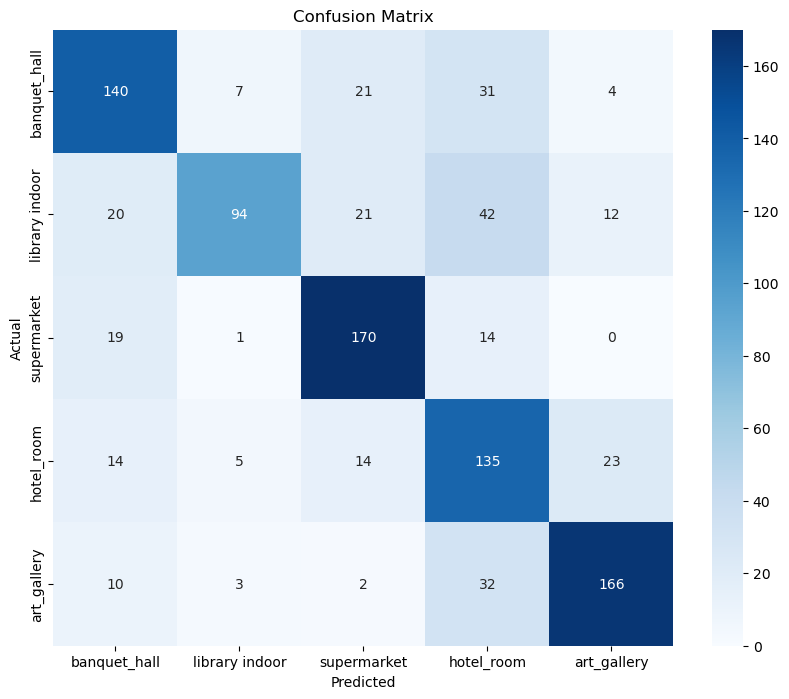

Classification Report:
                precision    recall  f1-score   support

  banquet_hall       0.69      0.69      0.69       203
library indoor       0.85      0.50      0.63       189
   supermarket       0.75      0.83      0.79       204
    hotel_room       0.53      0.71      0.61       191
   art_gallery       0.81      0.78      0.79       213

      accuracy                           0.70      1000
     macro avg       0.73      0.70      0.70      1000
  weighted avg       0.73      0.70      0.70      1000



In [14]:



# Testing the final model accuracy on the test set
y_test = label_encoder.fit_transform(y_test)
y_pred = clf.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy on test set: {final_accuracy:.4f}")


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score: {f1}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred, target_names=label_names)
print('Classification Report:')
print(class_report)